In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
Heart_Attack_Prediction_data = pd.read_csv('heart_attack_prediction_dataset[1].csv')

In [4]:
df = Heart_Attack_Prediction_data.copy()

In [5]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
df.shape

(8763, 26)

## Understanding the Data

In [7]:
columns = df.columns
print(columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


* **Patient ID**: Unique identifier of each patient
* **Age**: Age of the patient 
* **Sex**: Gender of the patient (M/F)
* **Cholesterol**: Cholesterol levels in mg/dl units
* **Blood Pressure**: it is calculated in systolic pressure/diastolic pressure. So we can divide it into 2 features.
* **Heart Rate**: Heart beats per minute
* **Diabetes**: Whether or not the patient has diabetes (0/1)
* **Family History**: Whether or not any of the family number has suffured with the heart attack.
* **Smoking**: Whether or not patient has habit of smoking (0/1)
* **Obesity**: Whether or not patient is obese. (0/1)
* **Alcohol Consumption**: Whether or not patient consumes alcohol or not. (0/1)
* **Exercise Hours Per Week**: How many hours of exersice does the patient work out.
* **Diet**: Levels of Diet (Healthy, Average, Unhealthy) --> (1,0,-1)
* **Previous Heart problems**: Whether or not the patient has previous heart problems (0/1)
* **Medication Use**: Whether or not the patient is taking any medication
* **Stress Level**: Stress level out of 10
* **Sedentary hours per day**: How much time the person spent time on sitting per day
* **Income**: Income of the patient
* **BMI**: Body mass index of the person
* **Tryglycerides**: These are a type of fat present in the blood that are stored in our fat cells.
* **Physical Activity Days Per Week**: Hours spent on physical activities per day
* **Sleep Hours per Day**: Amount of sleep the patient taking per day
* **Country**: Country of the patient living
* **Continent**: Continent of the patient's Country
* **Hemisphere**: Hemisphere of the patient's Continent (Nothern/Southern) --> (0/1)


* **Heart Attack Risk**: Whether the patient suffered with Heart Attack or not --> **Target Variable** (0/1)


In [8]:
df.drop('Patient ID',axis = 1,inplace = True)

In [9]:
df['Sex'].replace({'Male':0,'Female':1},inplace = True)

In [10]:
sys_bp = [] #Numerator
dia_bp = [] #Denominator
for bp in df['Blood Pressure']:
    num,den = bp.split('/')
    sys_bp.append(int(num))
    dia_bp.append(int(den))
sys_bp = np.array(sys_bp)
dia_bp = np.array(dia_bp)
df['sys_bp'] = sys_bp
df['dia_bp'] = dia_bp
df.drop('Blood Pressure',axis = 1,inplace = True)

In [11]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,sys_bp,dia_bp
0,67,0,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [12]:
df.Diet.replace({'Healthy':2,'Average':1,'Unhealthy':0},inplace = True)

In [13]:
df.Hemisphere.replace({'Southern Hemisphere':0, 'Northern Hemisphere':1},inplace = True)

In [14]:
df.drop(['Country','Continent'],axis = 1,inplace  = True)

In [15]:
train_size = int(0.8*df.shape[0])
df = df.sample(frac = 1)
df_train = df[:train_size]
df_test = df[train_size:]

In [16]:
df_train.reset_index(inplace = True,drop = True)
df_test.reset_index(inplace = True,drop = True)

In [17]:
corr = df_train.corr()

In [18]:
corr.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Hemisphere',
       'Heart Attack Risk', 'sys_bp', 'dia_bp'],
      dtype='object')

In [19]:
cols = corr.columns
corelated_columns = set()
for i in range(len(cols)):
    for j in range(i):
        if abs(corr[cols[i]][cols[j]]) > 0.8:
            corelated_columns.add(cols[i])
print(len(corelated_columns))
corelated_columns

0


set()

In [20]:
df_train.duplicated().sum()

0

* So, There are no duplicates and no pair of features that has a corelation > 0.8

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              7010 non-null   int64  
 1   Sex                              7010 non-null   int64  
 2   Cholesterol                      7010 non-null   int64  
 3   Heart Rate                       7010 non-null   int64  
 4   Diabetes                         7010 non-null   int64  
 5   Family History                   7010 non-null   int64  
 6   Smoking                          7010 non-null   int64  
 7   Obesity                          7010 non-null   int64  
 8   Alcohol Consumption              7010 non-null   int64  
 9   Exercise Hours Per Week          7010 non-null   float64
 10  Diet                             7010 non-null   int64  
 11  Previous Heart Problems          7010 non-null   int64  
 12  Medication Use      

In [22]:
num_cols = ['Age','Cholesterol','Heart Rate','sys_bp','dia_bp','Exercise Hours Per Week','Stress Level',
           'Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week',
           'Sleep Hours Per Day']

In [23]:
cat_cols = ['Sex','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Diet','Previous Heart Problems'
           ,'Medication Use','Hemisphere']

In [24]:
target = 'Heart Attack Risk'

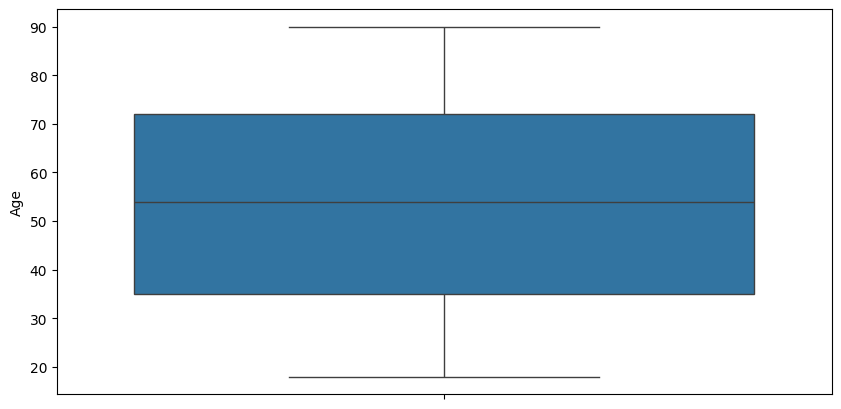

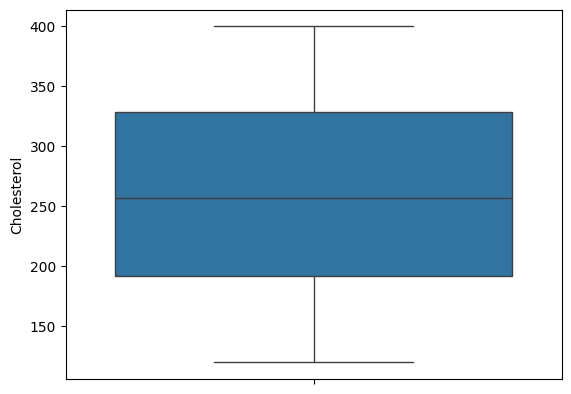

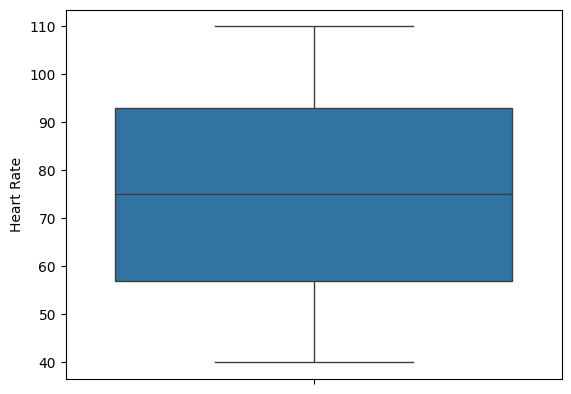

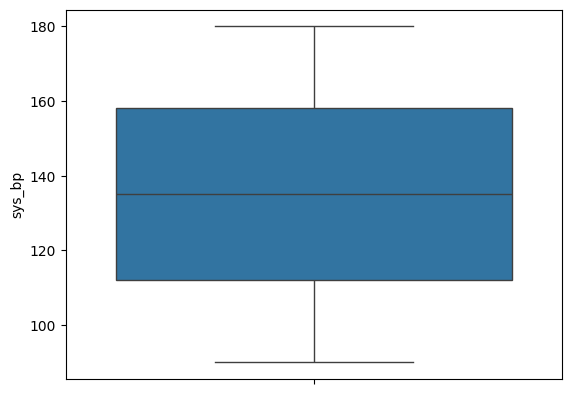

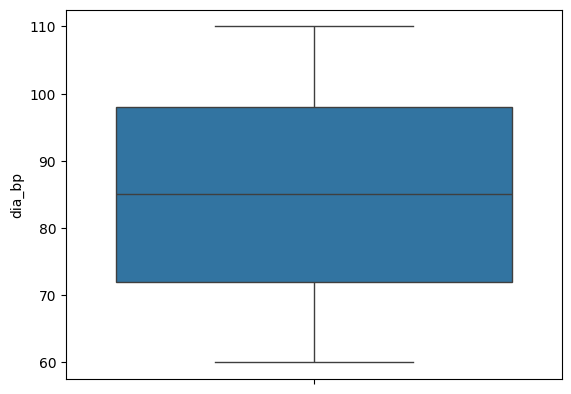

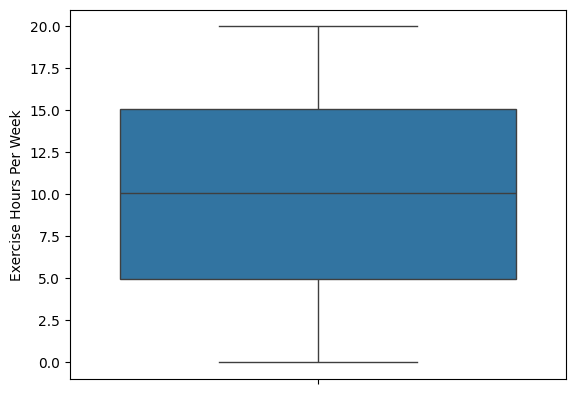

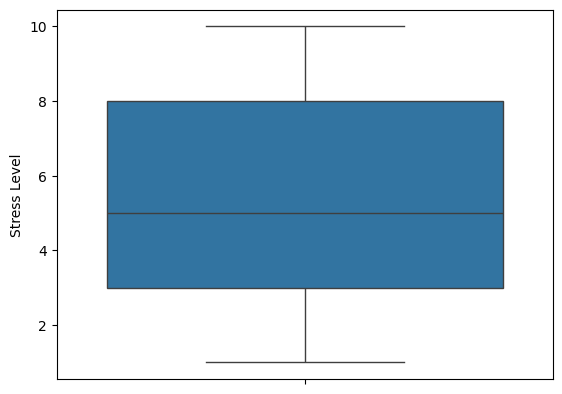

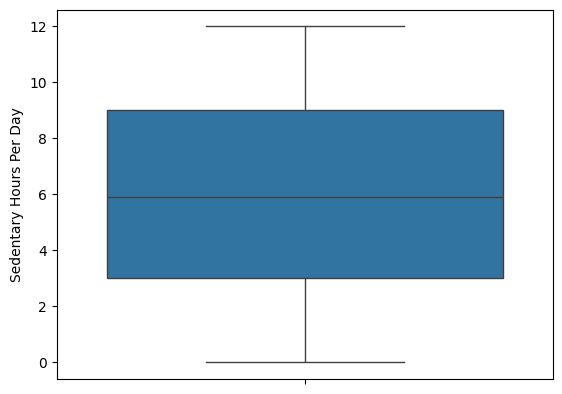

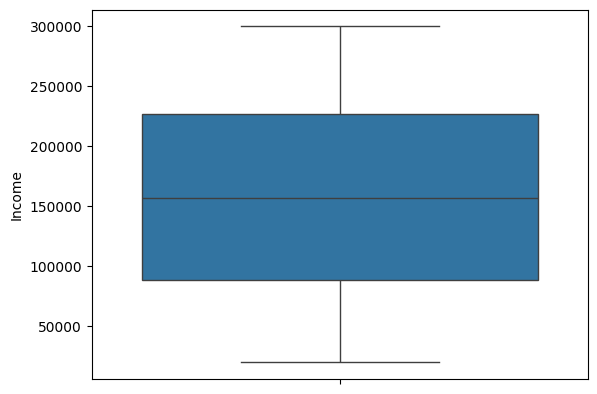

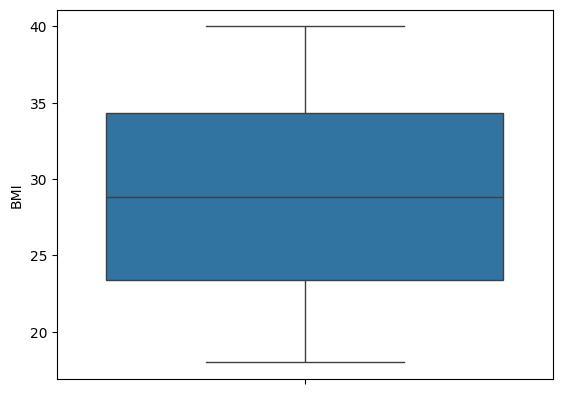

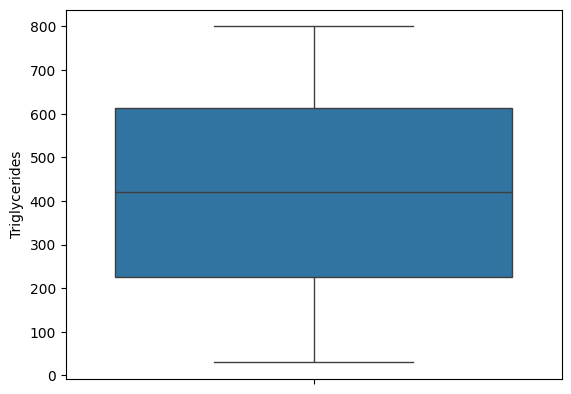

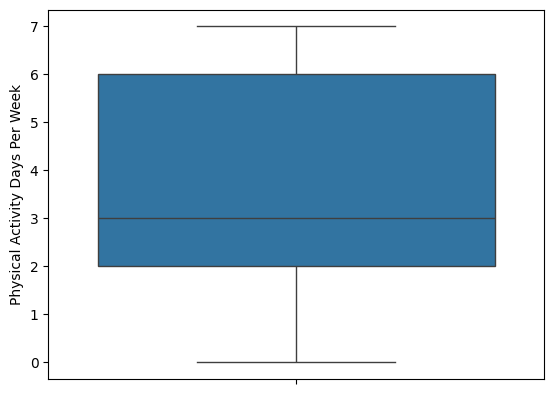

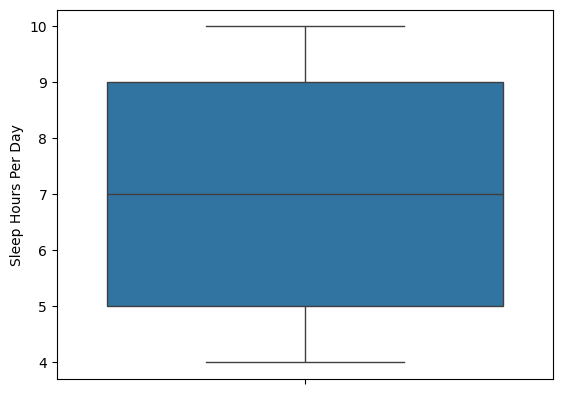

In [25]:
plt.figure(figsize = (10,5))
for i in range(len(num_cols)):
    sns.boxplot(y = df_train[num_cols[i]])
    plt.show()

In [26]:
df_train[num_cols].describe()

,Age,Cholesterol,Heart Rate,sys_bp,dia_bp,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.663195,259.521255,75.046077,134.896576,85.104565,10.032502,5.465621,5.996989,157765.335806,28.916896,418.711983,3.491441,7.023680
std,21.227329,80.894769,20.646596,26.383159,14.687870,5.790336,2.859785,3.453456,80280.105109,6.339272,224.081244,2.289629,1.984462
min,18.000000,120.000000,40.000000,90.000000,60.000000,0.002442,1.000000,0.003625,20062.000000,18.004211,30.000000,0.000000,4.000000
25%,35.000000,192.000000,57.000000,112.000000,72.000000,4.991864,3.000000,3.029976,88575.750000,23.422280,226.000000,2.000000,5.000000
50%,54.000000,257.000000,75.000000,135.000000,85.000000,10.094986,5.000000,5.915035,157129.000000,28.843386,419.500000,3.000000,7.000000
75%,72.000000,329.000000,93.000000,158.000000,98.000000,15.093239,8.000000,9.017592,226733.250000,34.340229,613.000000,6.000000,9.000000
max,90.000000,400.000000,110.000000,180.000000,110.000000,19.998709,10.000000,11.999313,299954.000000,39.993581,800.000000,7.000000,10.000000


In [27]:
df_train['Sex']

0       1
1       0
2       1
3       0
4       1
       ..
7005    1
7006    1
7007    1
7008    0
7009    0
Name: Sex, Length: 7010, dtype: int64

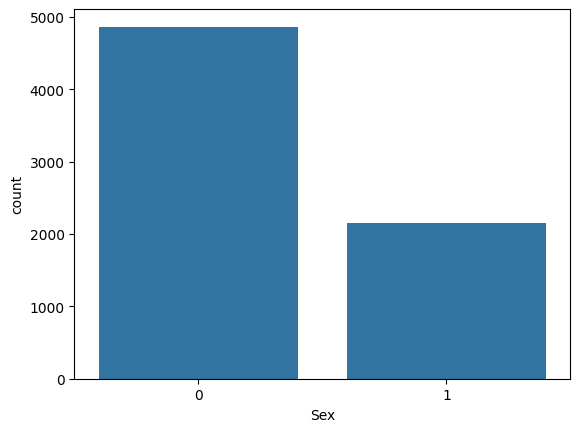

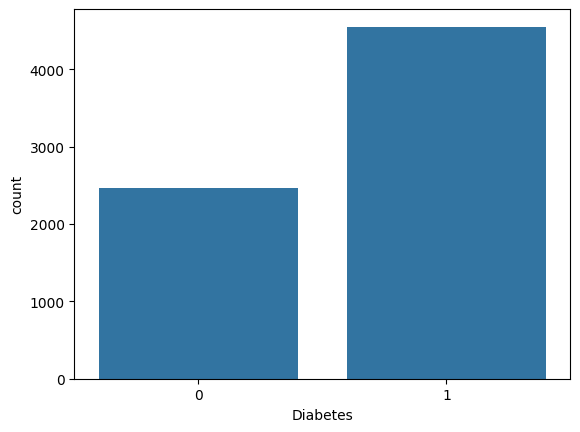

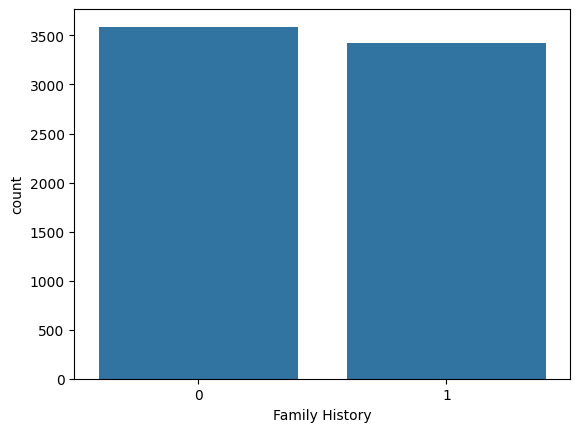

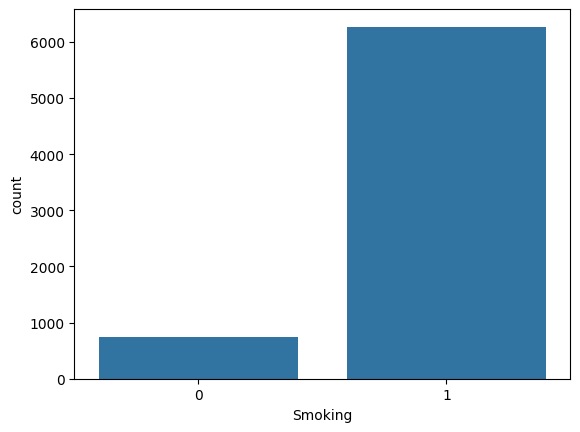

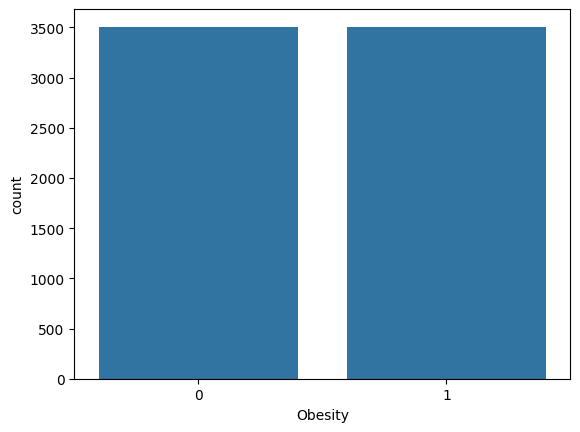

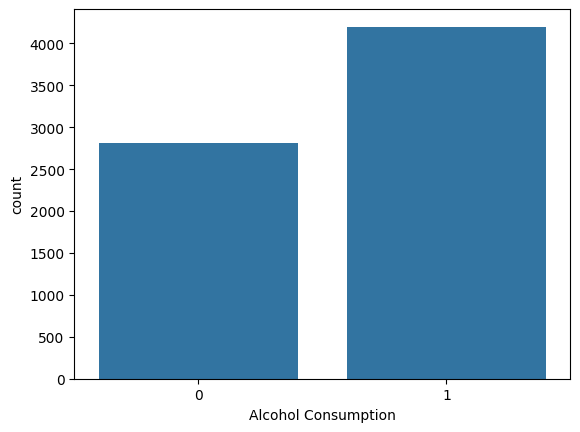

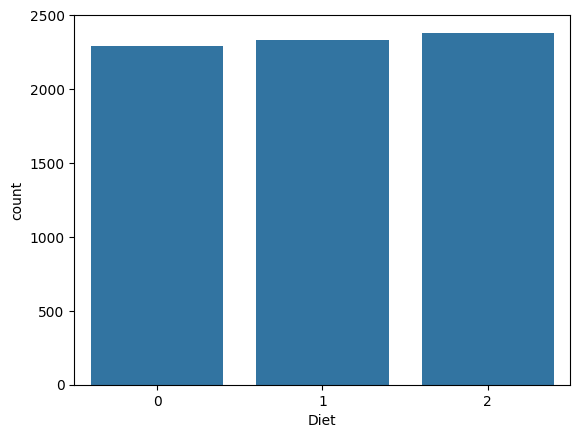

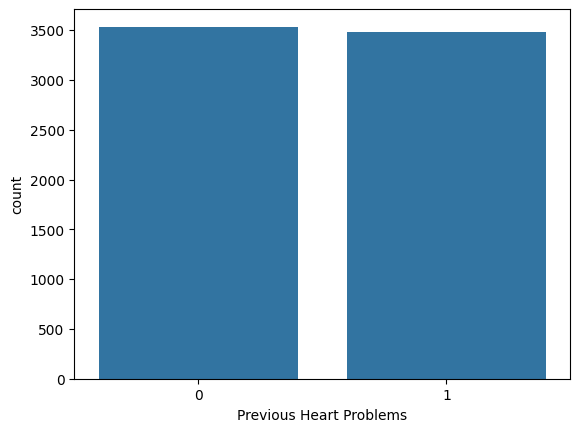

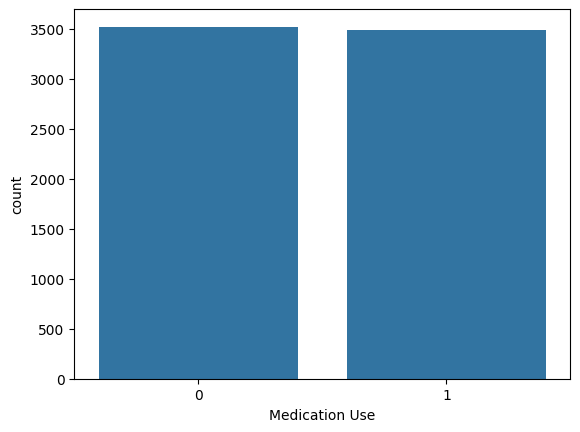

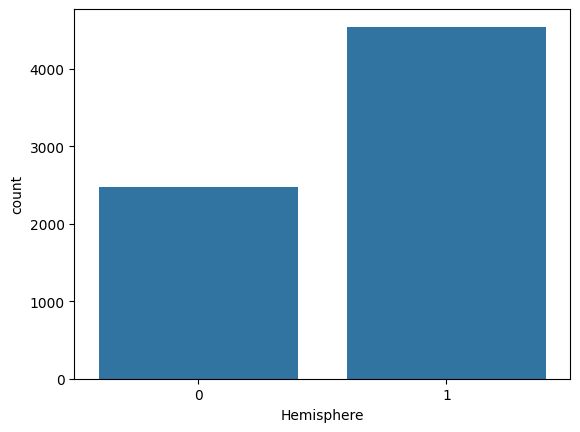

In [28]:
for col in cat_cols:
    sns.countplot(df_train,x = col)
    plt.show()

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

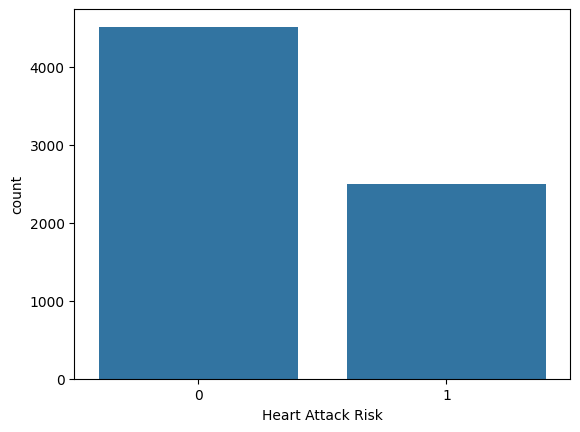

In [29]:
sns.countplot(df_train,x = 'Heart Attack Risk')

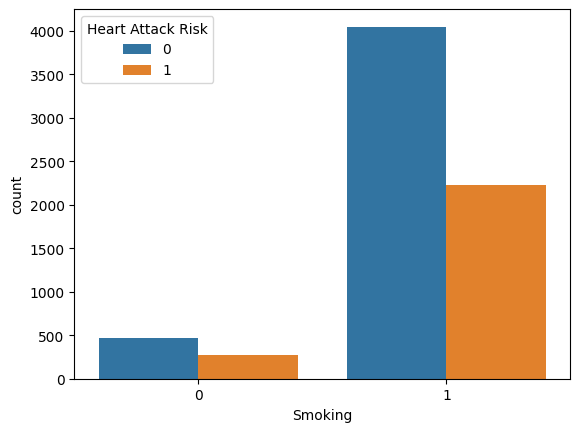

In [30]:
sns.countplot(df_train,x = 'Smoking',hue = 'Heart Attack Risk')
plt.show()

In [31]:
X_train = df_train.drop('Heart Attack Risk',axis = 1)
y_train = df_train['Heart Attack Risk']

In [32]:
X_train_cat = X_train[cat_cols]

In [33]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X_train_cat,y_train)

In [34]:
chi_scores

(array([1.31583122e-03, 6.76497660e-01, 8.35846533e-01, 5.16851280e-02,
        1.18460298e+00, 1.23713049e+00, 2.23861953e-02, 1.74241669e-03,
        4.74062965e-05, 1.18869630e-01]),
 array([0.97106357, 0.41079536, 0.36058737, 0.82015655, 0.27642091,
        0.2660248 , 0.88106429, 0.96670416, 0.99450643, 0.73026372]))

In [35]:
chi_vals = chi_scores[0]
p_vals = chi_scores[1]
for i in range(len(p_vals)):
    if p_vals[i]<=0.05:
        print(cat_cols[i])

In [36]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train_cat,y_train)
print(mi)

[0.         0.00570969 0.         0.00602559 0.         0.01149796
 0.         0.00067303 0.         0.        ]


* We have observed that all these categorical values has higher p values and lower mi (mutual information) values, it indictes that none of these features have a statistically significant ralationship with the target variable.

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train,y_train = smote.fit_resample(X_train,y_train)

In [38]:
X_train['Heart Attack Risk'] = y_train
df_train = X_train
X_train = df_train.drop('Heart Attack Risk',axis = 1)

In [39]:
X_test = df_test.drop('Heart Attack Risk',axis = 1)
y_test = df_test['Heart Attack Risk']

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
scores = cross_val_score(model,X_train,y_train,cv = 5)
model.fit(X_train,y_train)
print('Mean Accuracy : ',scores.mean())
print('Test Accuracy : ',model.score(X_test,y_test))

Mean Accuracy :  0.6716500553709857
Test Accuracy :  0.5641756988020536


In [41]:
X_temp_train = X_train.drop(cat_cols,axis = 1)
X_temp_test = X_test.drop(cat_cols,axis = 1)
model = RandomForestClassifier()
scores = cross_val_score(model,X_temp_train,y_train,cv = 5)
model.fit(X_temp_train,y_train)
print('Mean Accuracy : ',scores.mean())
print('Test Accuracy : ',model.score(X_temp_test,y_test))

Mean Accuracy :  0.6724252491694352
Test Accuracy :  0.5613234455219623


In [42]:
from sklearn.metrics import precision_score

In [43]:
y_pred = model.predict(X_temp_test)
y_true = y_test
precision_score(y_true,y_pred)

0.37322515212981744

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['Feature'] = df_train.columns
vif_df['VIF'] = [variance_inflation_factor(df_train.values,i) for i in range(len(df_train.columns))]
pd.set_option('display.max_rows',None)
vif_df.sort_values(by = 'VIF',ascending = False)

,Feature,VIF
22,dia_bp,28.796436
21,sys_bp,24.327237
16,BMI,20.691800
3,Heart Rate,13.923666
19,Sleep Hours Per Day,12.949534
2,Cholesterol,11.493662
6,Smoking,11.074414
0,Age,9.272690
13,Stress Level,4.739241
15,Income,4.728179


In [45]:
df_train.drop('dia_bp',axis = 1,inplace = True)
df_test.drop('dia_bp',axis = 1,inplace = True)

In [46]:
vif_df = pd.DataFrame()
vif_df['Feature'] = df_train.columns
vif_df['VIF'] = [variance_inflation_factor(df_train.values,i) for i in range(len(df_train.columns))]
pd.set_option('display.max_rows',None)
vif_df.sort_values(by = 'VIF',ascending = False)

,Feature,VIF
21,sys_bp,22.853973
16,BMI,19.874107
3,Heart Rate,13.659247
19,Sleep Hours Per Day,12.614518
2,Cholesterol,11.272748
6,Smoking,11.032910
0,Age,9.242294
13,Stress Level,4.719157
15,Income,4.684418
17,Triglycerides,4.533241


In [47]:
df_train.drop('sys_bp',axis = 1,inplace = True)
df_test.drop('sys_bp',axis = 1,inplace = True)

In [48]:
vif_df = pd.DataFrame()
vif_df['Feature'] = df_train.columns
vif_df['VIF'] = [variance_inflation_factor(df_train.values,i) for i in range(len(df_train.columns))]
pd.set_option('display.max_rows',None)
vif_df.sort_values(by = 'VIF',ascending = False)

,Feature,VIF
16,BMI,18.698589
3,Heart Rate,13.229401
19,Sleep Hours Per Day,12.222125
2,Cholesterol,10.971769
6,Smoking,10.966636
0,Age,9.188171
13,Stress Level,4.669489
15,Income,4.637220
17,Triglycerides,4.490770
9,Exercise Hours Per Week,4.156000


In [49]:
df_train.drop('BMI',axis = 1,inplace = True)
df_test.drop('BMI',axis = 1,inplace = True)

In [50]:
vif_df = pd.DataFrame()
vif_df['Feature'] = df_train.columns
vif_df['VIF'] = [variance_inflation_factor(df_train.values,i) for i in range(len(df_train.columns))]
pd.set_option('display.max_rows',None)
vif_df.sort_values(by = 'VIF',ascending = False)

,Feature,VIF
3,Heart Rate,12.538808
18,Sleep Hours Per Day,11.761334
6,Smoking,10.828455
2,Cholesterol,10.526238
0,Age,9.153263
13,Stress Level,4.630040
15,Income,4.574560
16,Triglycerides,4.452581
9,Exercise Hours Per Week,4.120255
14,Sedentary Hours Per Day,4.106719


In [51]:
df_train.drop('Smoking',axis = 1,inplace = True)
df_test.drop('Smoking',axis = 1,inplace = True)

In [52]:
vif_df = pd.DataFrame()
vif_df['Feature'] = df_train.columns
vif_df['VIF'] = [variance_inflation_factor(df_train.values,i) for i in range(len(df_train.columns))]
pd.set_option('display.max_rows',None)
vif_df.sort_values(by = 'VIF',ascending = False)

,Feature,VIF
3,Heart Rate,12.436359
17,Sleep Hours Per Day,11.606494
2,Cholesterol,10.373640
0,Age,7.236561
12,Stress Level,4.618544
14,Income,4.559391
15,Triglycerides,4.432720
8,Exercise Hours Per Week,4.110737
13,Sedentary Hours Per Day,4.097907
16,Physical Activity Days Per Week,3.303573


In [53]:
df_train.drop('Heart Rate',axis = 1,inplace = True)
df_test.drop('Heart Rate',axis = 1,inplace = True)

In [54]:
vif_df = pd.DataFrame()
vif_df['Feature'] = df_train.columns
vif_df['VIF'] = [variance_inflation_factor(df_train.values,i) for i in range(len(df_train.columns))]
pd.set_option('display.max_rows',None)
vif_df.sort_values(by = 'VIF',ascending = False)

,Feature,VIF
16,Sleep Hours Per Day,11.030463
2,Cholesterol,9.977804
0,Age,7.082317
11,Stress Level,4.574048
13,Income,4.505313
14,Triglycerides,4.365369
7,Exercise Hours Per Week,4.066633
12,Sedentary Hours Per Day,4.063805
15,Physical Activity Days Per Week,3.281807
17,Hemisphere,2.513923


In [55]:
df_train.head()

,Age,Sex,Cholesterol,Diabetes,Family History,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk
0,55,1,355,1,0,1,1,16.169649,1,1,1,5,2.680031,195549,449,7,5,1,0
1,48,0,247,0,1,1,0,14.090643,0,0,0,7,11.296274,194116,204,5,5,0,0
2,28,1,130,1,1,1,0,8.657844,2,1,0,4,4.404686,258962,603,0,6,0,0
3,53,0,282,1,0,1,0,0.524118,2,1,0,3,0.142461,140601,548,5,4,1,0
4,64,1,226,1,0,0,0,0.690525,1,0,1,6,8.482025,153827,128,7,8,1,0


In [56]:
X_train = df_train.drop('Heart Attack Risk',axis = 1)
y_train = df_train['Heart Attack Risk']
X_test = df_test.drop('Heart Attack Risk',axis = 1)
y_test = df_test['Heart Attack Risk']

In [57]:
df_train.shape

(9030, 19)

In [58]:
model = RandomForestClassifier()
scores = cross_val_score(model,X_train,y_train,cv = 5)
model.fit(X_train,y_train)
print('Mean Accuracy : ',scores.mean())
print('Test Accuracy : ',model.score(X_test,y_test))

Mean Accuracy :  0.6612403100775194
Test Accuracy :  0.5521962350256703


In [59]:
y_pred = model.predict(X_test)
y_true = y_test
precision_score(y_true,y_pred)

0.32151898734177214

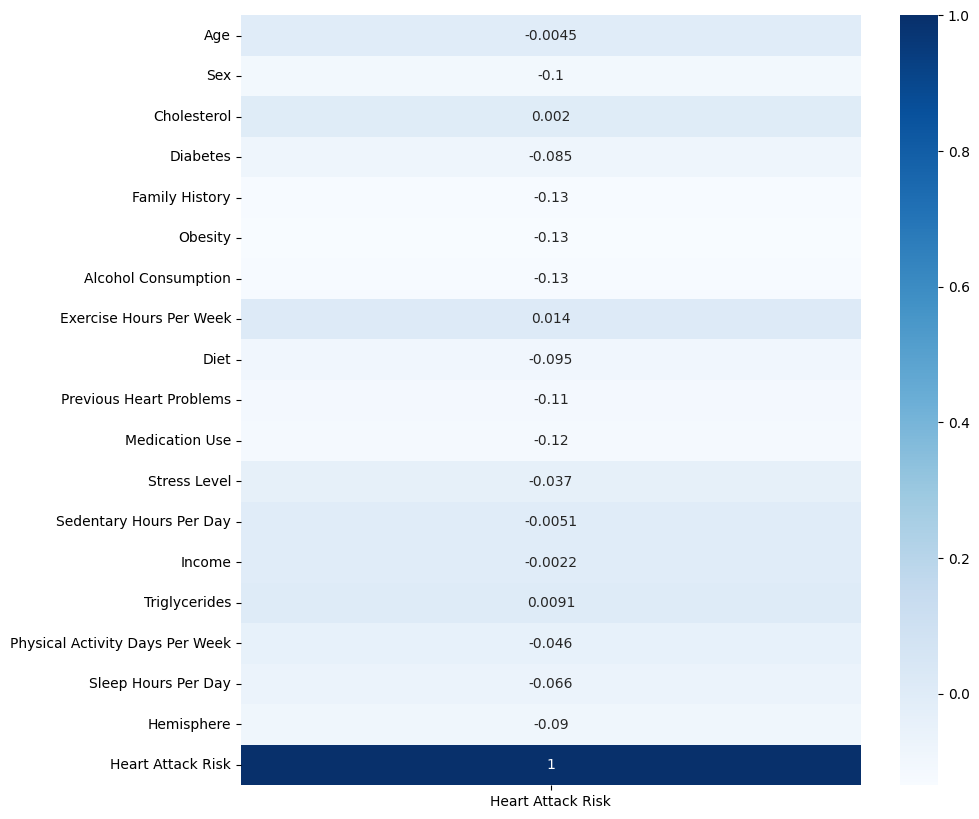

In [60]:
# Pearson Correlation
plt.figure(figsize = (10,10))
corr = df_train.corr().iloc[:,-1:]
sns.heatmap(corr,annot = True,cmap = plt.cm.Blues)
plt.show()

In [61]:
# HyperTuning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [62]:
model_params = {
    'Logistic_Regression':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1','l2','elasticnet','none'],
            'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
            'multi_class':['auto','ovr','multinomial'],
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']
        }
    },
    'Random_Forest_Classifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,15,20,25],
            'max_features':['sqrt','auto'],
            'max_depth':[2,4],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,2],
            'bootstrap':[True,False]
        }
    }
    }

In [63]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
optimum = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
optimum

,model,best_score,best_params
0,Logistic_Regression,0.613621,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
1,Decision_Tree,0.600554,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
2,Random_Forest_Classifier,0.626246,"{'bootstrap': True, 'max_depth': 4, 'max_featu..."


# Evaluation

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

## Logistic Regression

In [65]:
parameters = optimum['best_params'][0]
parameters

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

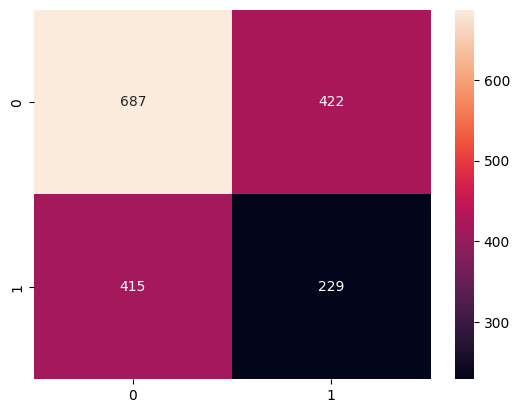



Classification Report

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1109
           1       0.35      0.36      0.35       644

    accuracy                           0.52      1753
   macro avg       0.49      0.49      0.49      1753
weighted avg       0.52      0.52      0.52      1753



In [66]:
model = LogisticRegression(solver = 'newton-cg',penalty = 'l2',multi_class = 'auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = '.0f')
plt.show()
print('\n')

print('Classification Report\n')

print(classification_report(y_test,y_pred))

In [67]:
optimum['best_params'][1]

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'random'}

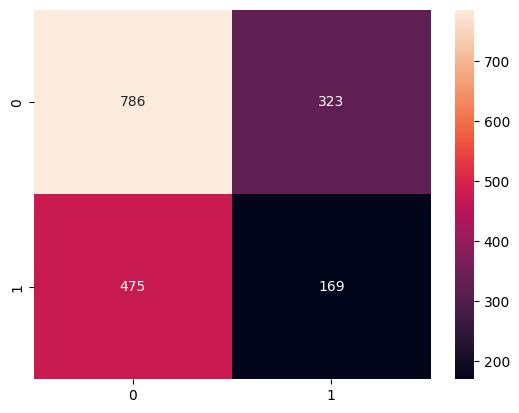



Classification Report

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1109
           1       0.34      0.26      0.30       644

    accuracy                           0.54      1753
   macro avg       0.48      0.49      0.48      1753
weighted avg       0.52      0.54      0.53      1753



In [82]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth = 6,max_features = 'log2',splitter = 'random')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = '.0f')
plt.show()
print('\n')

print('Classification Report\n')

print(classification_report(y_test,y_pred))

In [69]:
optimum['best_params'][2]

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 25}

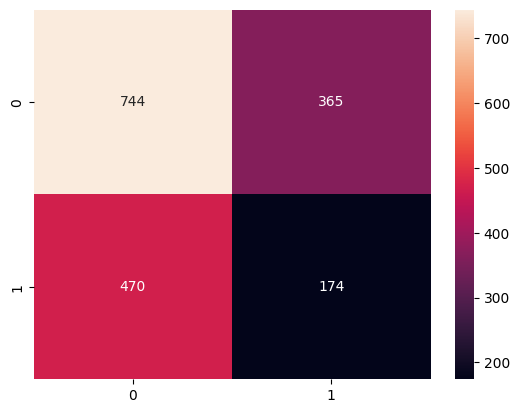



Classification Report

              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1109
           1       0.32      0.27      0.29       644

    accuracy                           0.52      1753
   macro avg       0.47      0.47      0.47      1753
weighted avg       0.51      0.52      0.51      1753



In [81]:
model = RandomForestClassifier(bootstrap = True,max_depth = 4,max_features = 'sqrt',
                               min_samples_leaf = 1, min_samples_split = 5,n_estimators =25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = '.0f')
plt.show()
print('\n')

print('Classification Report\n')

print(classification_report(y_test,y_pred))

In [71]:
import keras

In [72]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [73]:
ann = Sequential()
ann.add(Dense(1000,activation = 'relu',input_shape = (X_train.shape[1],)))
ann.add(Dense(500,activation = 'relu'))
ann.add(Dense(1,activation = 'sigmoid'))

In [76]:
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = [keras.metrics.Precision(),'accuracy'])
es = EarlyStopping(monitor = 'val_precision',mode = 'max',patience = 10,verbose = 1,restore_best_weights = True)

In [83]:
history = ann.fit(X_train,y_train,validation_data = (X_test,y_test),callbacks = [es],epochs = 5,batch_size = 5,verbose = 1)

Epoch 1/5
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.5039 - loss: 13.1453 - precision: 0.5077 - val_accuracy: 0.6326 - val_loss: 0.6809 - val_precision: 0.0000e+00
Epoch 2/5
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4959 - loss: 0.6937 - precision: 0.4114 - val_accuracy: 0.6321 - val_loss: 0.6895 - val_precision: 0.0000e+00
Epoch 3/5
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4957 - loss: 0.6934 - precision: 0.4736 - val_accuracy: 0.3674 - val_loss: 0.6956 - val_precision: 0.3674
Epoch 4/5
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.5045 - loss: 0.6931 - precision: 0.5065 - val_accuracy: 0.6321 - val_loss: 0.6924 - val_precision: 0.0000e+00
Epoch 5/5
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4966 - loss: 0.6933 - precision: 0.4596 - val_accuracy: 0.6321 - val_loss: 0.6891 - val_precision: 0.0000e+00
Restoring model weights from the end of the best epoch: 1.


In [84]:
ann.evaluate(X_test,y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 0.6812 - precision: 0.0000e+00


[0.6809374094009399, 0.0, 0.6326297521591187]

In [85]:
y_pred = ann.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


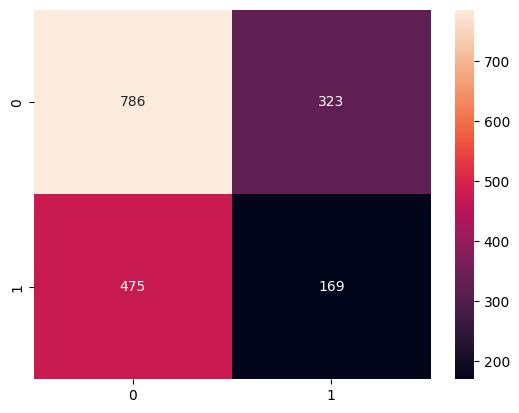



Classification Report

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1109
           1       0.34      0.26      0.30       644

    accuracy                           0.54      1753
   macro avg       0.48      0.49      0.48      1753
weighted avg       0.52      0.54      0.53      1753



In [87]:
y_pred = model.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = '.0f')
plt.show()
print('\n')

print('Classification Report\n')

print(classification_report(y_test,y_pred))

In [88]:
from numpy.linalg import eig

In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

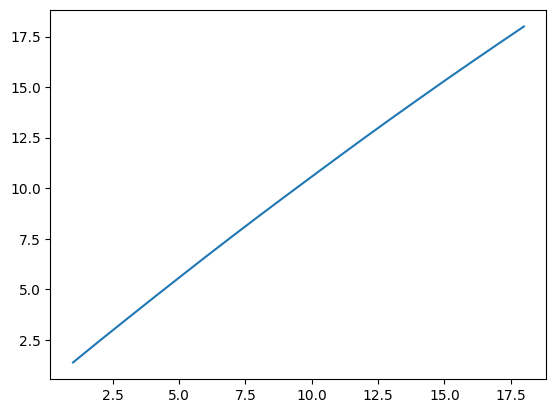

In [162]:
cov = np.cov(X_train_scaler.T)
e_vals,e_vecs = eig(cov)
e = -np.sort(-e_vals)

y = e.cumsum()
x = range(1,len(e)+1)
plt.plot(x,y)
plt.show()

In [163]:
max_var = 0.95*(y[-1])
for i in range(1,len(y)):
    if y[i]>=max_var:
        print(i)
        break

16


In [164]:
pca = PCA(n_components = 16)
X_train_pca = pca.fit_transform(X_train_scaler)
X_test_pca = pca.transform(X_test_scaler)

In [170]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
    clf.fit(X_train_pca,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
optimum = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
optimum

,model,best_score,best_params
0,Logistic_Regression,0.612292,"{'multi_class': 'multinomial', 'penalty': 'l2'..."
1,Decision_Tree,0.607420,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
2,Random_Forest_Classifier,0.623920,"{'bootstrap': True, 'max_depth': 4, 'max_featu..."


In [182]:
ann = Sequential()
ann.add(Dense(64,activation = 'linear',input_shape = (X_train_pca.shape[1],)))
ann.add(Dense(32,activation = 'linear'))
ann.add(Dense(1,activation = 'sigmoid'))
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = [keras.metrics.Precision(),'accuracy'])
es = EarlyStopping(monitor = 'val_precision',mode = 'max',patience = 15,verbose = 1,restore_best_weights = True)
history = ann.fit(X_train_pca,y_train,validation_data = (X_test_pca,y_test),callbacks = [es],epochs = 20,batch_size = 10,verbose = 1)

Epoch 1/20
903/903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6066 - loss: 0.6666 - precision_3: 0.6090 - val_accuracy: 0.5163 - val_loss: 0.7507 - val_precision_3: 0.3445
Epoch 2/20
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6194 - loss: 0.6614 - precision_3: 0.6228 - val_accuracy: 0.5163 - val_loss: 0.7210 - val_precision_3: 0.3436
Epoch 3/20
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6181 - loss: 0.6538 - precision_3: 0.6186 - val_accuracy: 0.5180 - val_loss: 0.7324 - val_precision_3: 0.3562
Epoch 4/20
903/903 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6084 - loss: 0.6567 - precision_3: 0.6157 - val_accuracy: 0.5203 - val_loss: 0.7296 - val_precision_3: 0.3409
Epoch 5/20
903/903 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6111 - loss: 0.6540 - precision_3: 0.6153 - val_accuracy: 0.5134 - val_loss: 0.7085 - val_precision_3: 0.3433
Epoch 6/20
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6155 - loss: 0.6550 - precision_3: 0.6063 - val_accura

In [183]:
y_pred = ann.predict(X_test_pca)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [184]:
y_pred = y_pred>=0.5

<Axes: >

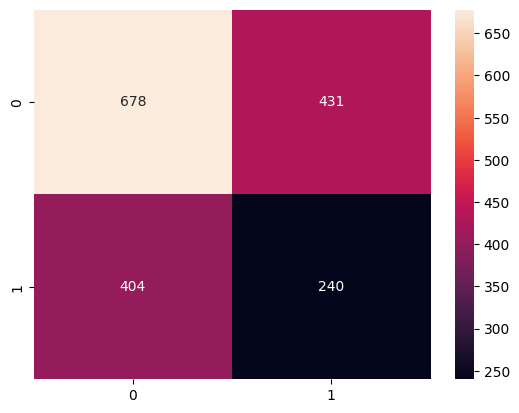

In [185]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = '.0f')

In [187]:
df_train.columns

Index(['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Family History', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

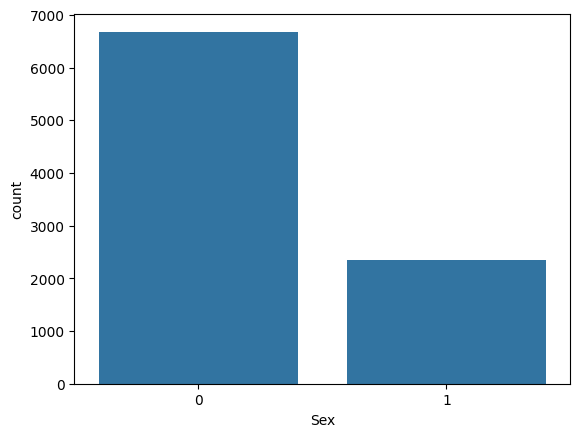

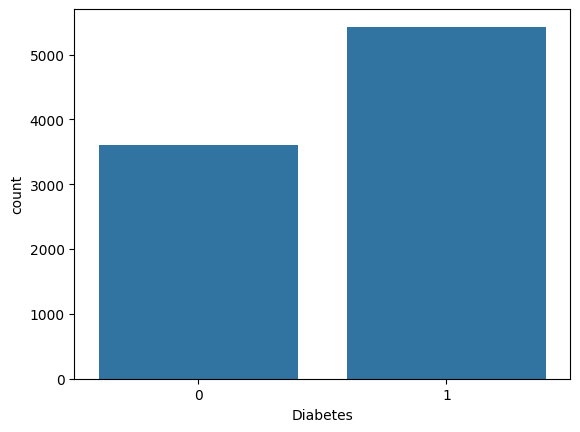

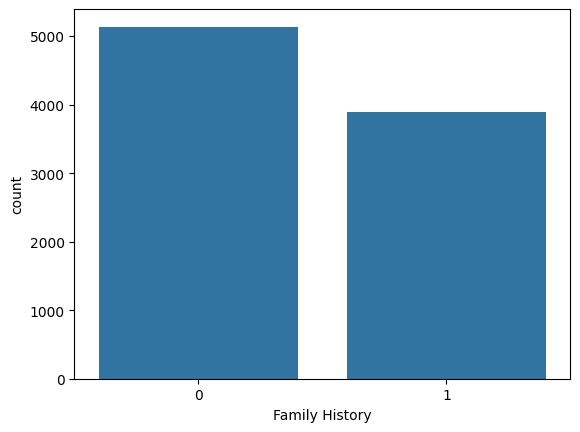

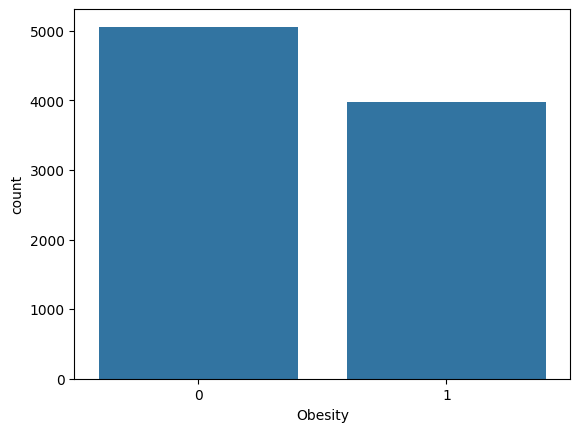

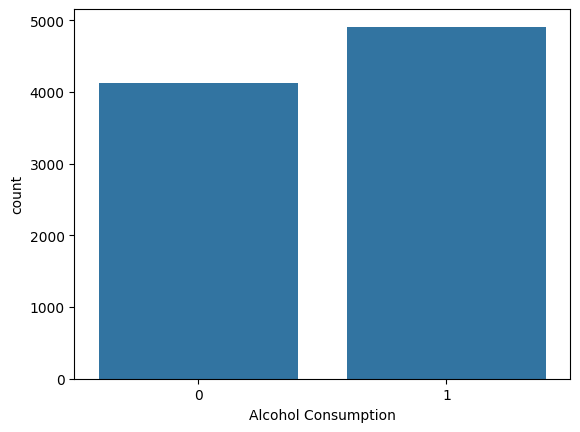

In [188]:
for col in ['Sex','Diabetes','Family History','Obesity','Alcohol Consumption']:
    sns.countplot(df_train,x = col)
    plt.show()

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [194]:
knn.score(X_train_pca,y_train)

0.7561461794019934

In [195]:
knn.score(X_test_pca,y_test)

0.49286936679977184

In [199]:
params = {
    'n_neighbors' : [4,5,6,7],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [20,25,30,35],
    'p' : [1,2]
}
clf = GridSearchCV(KNeighborsClassifier(),params,cv = 5,return_train_score = False)
clf.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35],
                         'n_neighbors': [4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})